In [2]:
import pandas as pd

In [3]:
car = pd.read_csv('C:\\Users\\Karan Narula\\AppData\\Local\\Temp\\fead26b9-f4c5-4173-95cf-00f07172d2fa_Course_Materials_ALL.zip.2fa\\Course_Materials_Part2\\Coding_Exercises\\cars.csv')

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
car.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [6]:
car.groupby('origin')[['mpg']].mean()

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


In [7]:
mpg_by_year = car.groupby('model_year')[['mpg']].mean().round(2).sort_values('mpg', ascending=False)

<Axes: xlabel='model_year'>

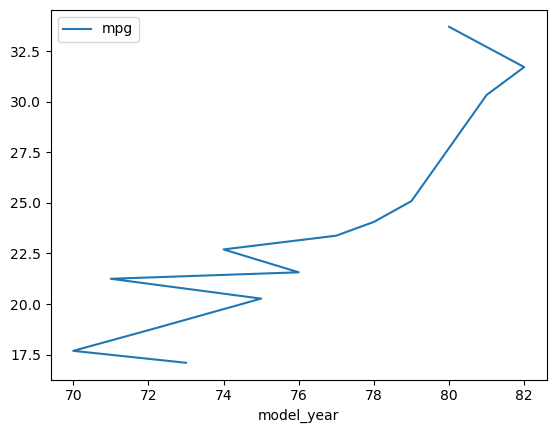

In [8]:
mpg_by_year.plot()

In [9]:
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
mpg_year_origin = car.groupby(['model_year', 'origin']).agg(Mean = ('mpg', 'mean')).sort_values(by = 'Mean', ascending=False).unstack().round(2)

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Karan Narula\AppData\Local\Temp\ipykernel_20796\2522582876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


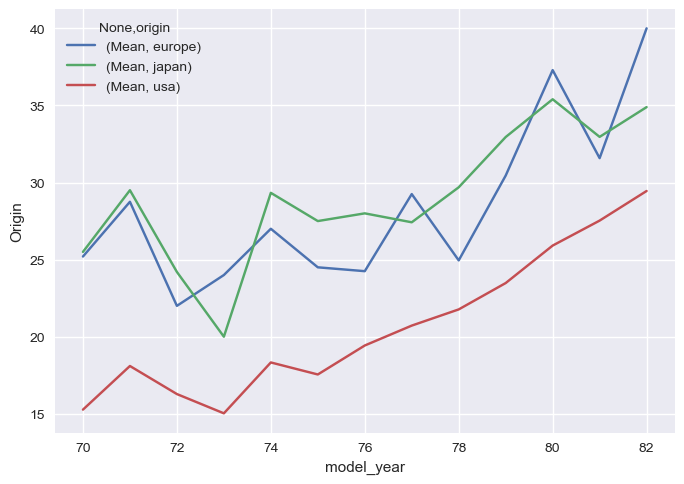

In [12]:
mpg_year_origin.plot(legend=True)
plt.ylabel('Origin')
plt.show()

In [13]:
car.groupby(['model_year', 'origin']).agg({'mpg': ['mean', 'max', 'min']}).unstack().round(2)

mpg                                                    
             mean                  max                min            
origin     europe  japan    usa europe japan   usa europe japan   usa
model_year                                                           
70          25.20  25.50  15.27   26.0  27.0  22.0   24.0  24.0   9.0
71          28.75  29.50  18.10   30.0  35.0  28.0   27.0  25.0  12.0
72          22.00  24.20  16.28   26.0  28.0  28.0   18.0  19.0  11.0
73          24.00  20.00  15.03   29.0  22.0  23.0   19.0  18.0  11.0
74          27.00  29.33  18.33   31.0  32.0  28.0   24.0  24.0  13.0
75          24.50  27.50  17.55   29.0  33.0  23.0   22.0  24.0  13.0
76          24.25  28.00  19.43   29.5  33.0  29.0   16.5  19.0  13.0
77          29.25  27.42  20.72   36.0  33.5  33.5   21.5  21.5  15.0
78          24.95  29.69  21.77   43.1  39.4  36.1   16.2  21.1  17.5
79          30.45  32.95  23.48   37.3  34.1  35.7   25.4  31.8  15.5
80          37.29  35.40  25.91   44.3  46.6  32.1   29.8  23.7  19.1
81          31.58  32.96  27.53   34.5  39.1  39.0   28.1  24.2  17.6
82          40.00  34.89  29.45   44.0  38.0  38.0   36.0  31.0  22.0

In [14]:
car.groupby(['model_year', 'origin']).agg({'mpg': 'max'}).nlargest(3, 'mpg')

mpg
model_year origin      
80         japan   46.6
           europe  44.3
82         europe  44.0

In [15]:
def get_most_efficient(group):
    return group.nlargest(n=2, columns = 'mpg').loc[:, ['name', 'mpg']]

In [16]:
most_eff = car.groupby(['model_year', 'origin']).apply(get_most_efficient)

In [17]:
most_eff = most_eff.droplevel(-1)

In [18]:
most_eff

name   mpg
model_year origin                                         
70         europe               vw 1131 deluxe sedan  26.0
           europe                           bmw 2002  26.0
           japan                        datsun pl510  27.0
           japan               toyota corona mark ii  24.0
           usa                       plymouth duster  22.0
...                                              ...   ...
82         europe                        vw rabbit l  36.0
           japan                         honda civic  38.0
           japan                       datsun 310 gx  38.0
           usa                plymouth horizon miser  38.0
           usa     oldsmobile cutlass ciera (diesel)  38.0

[78 rows x 2 columns]

In [20]:
most_eff.loc[(79, 'japan')]

name   mpg
model_year origin                        
79         japan   mazda glc deluxe  34.1
           japan         datsun 210  31.8

In [ ]:
# Transaction = Transaction.assign(
#                               Average_Transaction = Transaction.groupby(['store_nbr', 'day_of_weeks'])['transactions'].transform('mean').round(2),
#                              difference = lambda x : x['transactions'] - x['Average_Transaction'] 

In [24]:
car = car.assign(group_specific_value = car.groupby(['model_year', 'origin'])['mpg'].transform('mean').round(2))

In [25]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_value
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.27
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.27
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.27
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.27
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.27
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.45
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,40.00
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,29.45
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,29.45
